In [378]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import linalg
import numpy as np
from scipy.stats import f, norm, chi2
from sklearn.linear_model import LogisticRegression
from math import e, log

In [379]:
data = pd.read_csv("athletes_edited.csv")
display(data)

,nationality,sport,age,male,height,weight,won_any,won_gold,total_medals
0,ESP,athletics,46,1,172,64,0,0,0
1,KOR,fencing,29,0,168,56,0,0,0
2,CAN,athletics,24,1,198,79,1,0,1
3,MDA,taekwondo,25,1,183,80,0,0,0
4,NZL,cycling,25,1,181,71,0,0,0
...,...,...,...,...,...,...,...,...,...
10853,CUB,athletics,20,0,164,58,0,0,0
10854,CZE,athletics,29,0,173,63,0,0,0
10855,CHN,wrestling,25,1,185,100,0,0,0
10856,VIE,weightlifting,27,1,160,56,0,0,0


# Part 1 - Linear Regression

## Q1

The explaining variables we chose:
- height (continuous) - represents the height (in cm) of the athlete. This variable has many values, and therefore we can consider it as a continuous variable by the project instructions.

- age (continuous) - represents the age (in years) of the athlete. This variable has many values, and therefore we can consider it as a continuous variable by the project instructions.

- male (discrete) - represents the gender of the athlete. This variable has only two values, 1 if the athlete is male, and 0 if the athlete is female. It is a binary variable and therefore discrete.

The explained variable we chose:
- weight (continuous) - represents the weight (in kg) of the athlete. This variable has many values, and therefore we can consider it as a continuous variable by the project instructions.

### Research question -- Do changes in the variables ('height', 'age', 'male') affect the variable 'weight'?

## Q2

In [380]:
# sample 200 samples from our dataset
# we set the "random_state" in order to get consistent results
sampled_data1 = data.sample(n=200, random_state=0)
display(sampled_data1)

,nationality,sport,age,male,height,weight,won_any,won_gold,total_medals
6798,GER,athletics,29,1,189,78,0,0,0
2124,CUB,athletics,28,0,171,60,0,0,0
159,NIG,judo,28,1,180,73,0,0,0
4148,EGY,judo,34,1,195,105,0,0,0
1478,RSA,aquatics,25,1,158,86,0,0,0
...,...,...,...,...,...,...,...,...,...
3000,HUN,aquatics,30,0,173,64,0,0,0
1835,AUS,aquatics,17,0,162,62,0,0,0
2818,RUS,aquatics,22,0,166,62,1,0,1
9643,CIV,aquatics,21,0,176,63,0,0,0


## Q3

In [381]:
# functions for Q3

def create_histogram(values, col_name, units, bins):
    plt.style.use("ggplot")
    sns.histplot(values, bins=bins, kde=True, edgecolor='black', linewidth=1, color="cornflowerblue")
    
    plt.title(f"Histogram of {col_name} Values")
    plt.xlabel(f"{col_name} [{units}]")
    plt.ylabel("Number of Records")

    plt.show()

def create_two_var_histogram(values_1, values_2, x_label, units, bins_1, bins_2, show_won_any=False):
    if not show_won_any:
        sns.histplot(values_1, bins=bins_1, kde=False, label="male", color="tomato", edgecolor='black', linewidth=0.85)
        sns.histplot(values_2, bins=bins_2, kde=False, label="female", color="cornflowerblue", edgecolor='black', linewidth=0.85)

        plt.title("Histogram of Males' Weight Vs Females' Weight")
        plt.xlabel(f"{x_label} [{units}]")
        plt.ylabel("Number of Records")
        plt.legend()
        plt.show()
    
    else:
        sns.histplot(values_1, bins=bins_1, kde=False, label="didn't win", color="tomato", 
                     edgecolor='black', linewidth=0.85)
        sns.histplot(values_2, bins=bins_2, kde=False, label="won", color="royalblue", 
                     edgecolor='black', linewidth=0.85)

        plt.title(f"Histogram of {x_label} of Athletes Who\nWon VS Who Didn't Win")
        plt.xlabel(f"{x_label} [{units}]")
        plt.ylabel("Number of Records")
        plt.legend()
        plt.show()


def create_pie_chart(values, show_won_any=False):
    if not show_won_any:
        male_num = sum([1 for x in values if x == 1])
        female_num = sum([1 for x in values if x == 0])

        plt.pie([male_num, female_num], autopct='%1.2f%%', labels=["male", "female"], colors=["tomato", "cornflowerblue"], 
                wedgeprops={'edgecolor':'black', 'linewidth':1})
        plt.title("Distribution of Gender Among Athletes")
        plt.show()
    
    else:
        won_num = sum([1 for x in values if x == 1])
        not_won_num = sum([1 for x in values if x == 0])

        plt.pie([won_num, not_won_num], autopct='%1.2f%%', labels=["won", "didn't win"], colors=["tomato", "cornflowerblue"], 
                wedgeprops={'edgecolor':'black', 'linewidth':1})
        plt.title("Distribution of Athletes Who\nWon any Medals VS Who didn't Win")
        plt.show()



def create_scatter_plot(x, y, x_label, x_units, y_label, y_units, color):
    
    plt.scatter(x, y, c=color)
    
    plt.title(f"{y_label} as a Function of {x_label}")
    plt.xlabel(f"{x_label} [{x_units}]")
    plt.ylabel(f"{y_label} [{y_units}]")
    plt.show()

In [382]:
# data for Q3
gender_values1 = sampled_data1["male"].values.tolist()
age_values1 = sampled_data1["age"].values.tolist()
height_values1 = sampled_data1["height"].values.tolist()
weight_values1 = sampled_data1["weight"].values.tolist()

### Section A

Now, we would like to visually display the distributions of our explaining variables, using our plotting functions implemented above.

(*) Since our discrete variable ("male") is binary, we think pie chart is a more informative way (visually) to present it than a table.

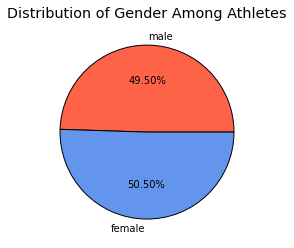

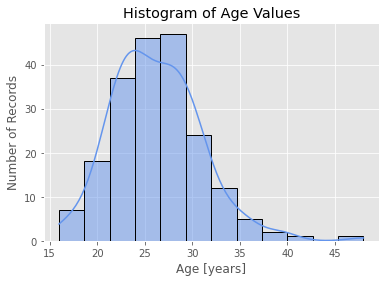

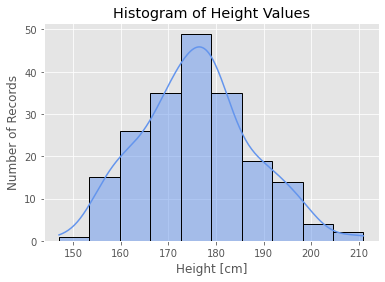

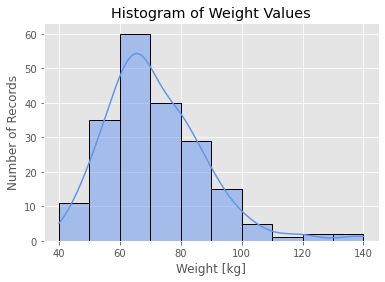

In [383]:
# create plots for our explaining variables

create_pie_chart(gender_values1)
create_histogram(age_values1, "Age", units="years", bins=12)
create_histogram(height_values1, "Height", units="cm", bins=10)
create_histogram(weight_values1, "Weight", units="kg", bins=10)

### Section B

_Are there any missing values?_

In project part 1, we removed all the records with any missing values of the relevant columns (such as height, weight, etc.).
Therefore, there aren't any missing values in our entire dataset, and that's why there aren't any missing values in the dataset we sampled.

_Are there any unusual (less common) variables' values?_

- Gender ("male") -- this variable has only two values: 1 if the athlete is male, 0 if the athlete is female. All the values are expectable, therefore we don't have any unusual values.

- Age -- as we can see from the Age Histogram graph, the majority of the values are between 20-30. The unusual values we got are ages 16-18 (left tail), and even more unusual values are 35-40 (right tail). We also noticed that the right tail isn't continuous, meaning that we didn't sample any athlete with age between 43-45.

- Height -- as we can see from the Height Histogram graph, the majority of the values are between 160-190. The unusual values we got are heights 145-155 (left tail) and 200-210 (right tail).

- Weight -- as we can see from the Weight Histogram graph, the majority of the values are between 50-90. The unusual values we got are weights 40-50 (left tail) and 100-140 (right tail), with weights 120-140 especially unusual.

_Is the distribution of each variable symmetrical?_

As we can see from the graphs, the distributions of Gender ("male") and height are symmetrical.

_Can you assess what is the distribution of each variable?_

- Gender ("male") -- as we can see from the Gender Pie chart graph, the number of males and females are equal. Therefore, we can assume that the distribution of this variable is Uniform.

- Age -- as we can see from the Age Histogram graph, the majority of the values are left-centered (between all the values) and the distribution has a long right tail. There are a few continuous distributions that qualify for these conditions (for example, Gamma distribution, Gumbel distribution, etc.).

- Height -- as we can see from the Height Histogram graph, the majority of the values are centered (between all the values), the distribution has both left and right tails, and it's symmetrical (as mentioned). Therefore, we can assume that the distribution of this variable is Normal.

- Weight - same as Age variable.

### Section C 

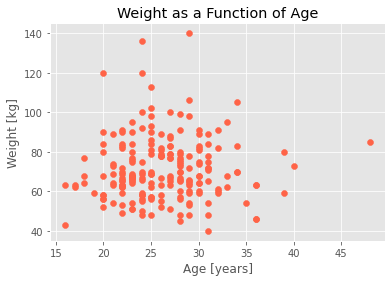

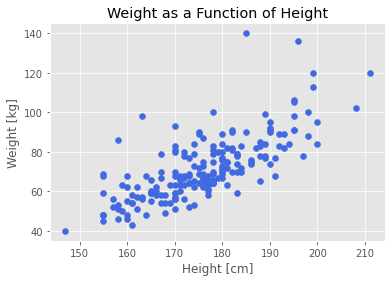

In [384]:
create_scatter_plot(x=age_values1, y=weight_values1, x_label="Age", x_units="years", y_label="Weight", y_units="kg", color="tomato")
create_scatter_plot(x=height_values1, y=weight_values1, x_label="Height", x_units="cm", y_label="Weight", y_units="kg", color="royalblue")

As we can see from the graphs above, it seems there's a high correlation between the athlete's weight and height (the weight increases as the height increases).

In addition, in the first graph, it seems that the points are randomly distributed. Therefore, we can assume that there's barely any correlation between the athlete's age and weight.

Thus, we can conclude that the explaining variable 'height' affects the explained variable 'weight' more than the explaining variable 'age'.

### Section D

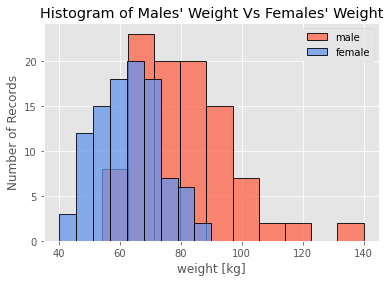

In [385]:
weight_values_male1 = sampled_data1[sampled_data1["male"] == 1]["weight"]
weight_values_female1 = sampled_data1[sampled_data1["male"] == 0]["weight"]

create_two_var_histogram(weight_values_male1, weight_values_female1, x_label="weight", units="kg", bins_1=10, bins_2=9)

Because our discrete variable ('male') has only two values (binary), we have only two different histograms to show. Therefore, we chose to plot them on the same grid in order to be able to visually distinguish the different results. To achieve this goal, we made the bars transparent.

As we can see, it appears that the 'weight' variable among female athletes is generally smaller than the 'weight' variable among male athletes. Moreover, it seems that both distributions are relatively symmetrical.

## Q4

In [386]:
def extract_X_y(data, X_columns, y_column):
    # create X matrix with first column as bias column
    X = data[X_columns]
    X.insert(loc=0, column="bias", value=[1 for i in range(len(X))])
    X = X.to_numpy()

    # create y vector
    y = data[y_column].to_numpy()

    return X, y

def find_beta_hat(X, y):
    beta_hat = linalg.inv(X.T @ X) @ X.T @ y
    return beta_hat

In [387]:
X1, y1 = extract_X_y(sampled_data1, X_columns=["height", "age", "male"], y_column="weight")
beta_hat1 = find_beta_hat(X1, y1)

print("The mean least square estimator beta_hat (based on sampled_data1):")
print(np.around(beta_hat1, 3))

The mean least square estimator beta_hat (based on sampled_data1):
[-81.431   0.864  -0.09    6.889]


Affect on expected 'weight' variable (explained variable) by incrementing each of 'height', 'age', 'male' variables (explaining variables):

- Height -- increases the predicated expected weight by 0.864
- Age -- decreases the predicated expected weight by 0.09 
- Male -- increases the predicated expected weight by 6.889 (incrementing this variable represents changing from female athlete to male athlete).

Our result implies that the variable 'age' barely has an impact on the variable 'weight' (because its coefficient is very close to 0), compared to 'male' and 'height'. In addition, we can see that the variable 'male' has the biggest impact on the variable 'weight'.

### Q5

In this question, we will find the values of ANOVA table, which requires us to calculate the F test statistic and its PV.

(*) In order to use F test, we will need to add the model's assumption that the error of each sample ($\epsilon_i$) is distributed $N (0, \space \sigma^2_\epsilon)$.

In [388]:
# calculations for creating the ANOVA table and finding "R_squared" and "R_squared_adj"

def find_sum_squares(beta_hat, X, y):
  y_avg = np.mean(y)
  SSR, SSE = 0, 0
  for xi, yi in zip(X, y):
    y_hat = beta_hat.T @ xi
    SSR += (y_hat - y_avg) ** 2
    SSE += (y_hat - yi) ** 2

  SST = SSR + SSE

  return SSR, SSE, SST

n, p = X1.shape
k = p - 1

SSR, SSE, SST = find_sum_squares(beta_hat1, X1, y1)
SSR_df, SSE_df, SST_df = k, n-p, n-1

MSR = SSR / SSR_df
MSE = SSE / SSE_df
MST = SST / SST_df

F = MSR / MSE
p_value = 1 - f.cdf(F, k, n-p)

R_squared = SSR / SST
R_squared_adj = 1 - (MSE / MST)

In [389]:
anova_dict = {"Source": ["Regression", "Errors", "Total"], 
              "SumOfSquares": [round(SSR, 3), round(SSE, 3), round(SST, 3)], 
              "MS": [round(MSR, 3), round(MSE, 3), round(MST, 3)], 
              "F": [f"F: {round(F, 3)}", f"PV: {round(p_value, 18)}", "-"]}

print(f"R_squared: {round(R_squared, 3)}")
print(f"R_squared_adj: {round(R_squared_adj, 3)} \n")

print("ANOVA Table:")
df = pd.DataFrame(data=anova_dict).style.hide_index()
display(df)

R_squared: 0.571
R_squared_adj: 0.565 

ANOVA Table:


Source,SumOfSquares,MS,F
Regression,29473.449000,9824.483000,F: 87.021
Errors,22127.946000,112.898000,PV: 1.11e-16
Total,51601.395000,259.303000,-


### Q6

In this question, we will find a confidence interval for $\beta^*_j$ for all $0 \le j \le k$

Each confidence interval will have an approximated confidence level of 0.95.

In [390]:
var_hat = MSE * linalg.inv(X1.T @ X1)
z = norm.ppf(0.975)

for i, beta_i_hat in enumerate(beta_hat1):
    se_i_hat = var_hat[i][i] ** 0.5
    confidence_interval = [round(beta_i_hat - (z * se_i_hat), 3), round(beta_i_hat + (z * se_i_hat), 3)]
    print(f"confidence interval for beta {i} with approximated confidence level of 0.95:")
    print(confidence_interval)
    print()

confidence interval for beta 0 with approximated confidence level of 0.95:
[-108.617, -54.244]

confidence interval for beta 1 with approximated confidence level of 0.95:
[0.71, 1.017]

confidence interval for beta 2 with approximated confidence level of 0.95:
[-0.403, 0.224]

confidence interval for beta 3 with approximated confidence level of 0.95:
[3.353, 10.425]



In [391]:
X_all1, y_all1 = extract_X_y(data, X_columns=["height", "age", "male"], y_column="weight")

beta_hat_all1 = find_beta_hat(X_all1, y_all1)

print("The mean least square estimator beta_hat (based on all data):")
print(np.around(beta_hat_all1, 3))

The mean least square estimator beta_hat (based on all data):
[-101.834    0.945    0.145    5.662]


We can see that for all $0 \le j \le k,$ our mean squares estimator $\hat\beta_j$ (calculated based on the full dataset) is trapped in the confidence interval calculated based on the sampled data (200 random samples).

## Q7

We would like to check the following hypotheses:

$H_0: \beta^*_j = 0$ for all $1 \le j \le k$

$H_1: \beta^*_j \ne 0$ for at least $j \gt 0$

In order to achieve our goal, we will use F test with level $\alpha = 0.05$.

the test statistic: $F = \frac{MSR}{MSE}$

the reject region: $F > F_{0.95, \space(k, \space n-p)}$

(*) In order to use this test, we will need to add the model's assumption that the error of each sample ($\epsilon_i$) is distributed $N (0, \space \sigma^2_\epsilon)$.

In [392]:
F = MSR/MSE

# reject region
qf = f.ppf(0.95, k, n-p)

reject_h0 = F > qf

if reject_h0:  
    print(f"The result of our test is --- Reject H_0")
else:
    print(f"The result of the test is --- Retain H_0")

The result of our test is --- Reject H_0


As we can see above, we can reject the null hypothesis with level $\alpha = 0.05$

Notice that in the ANOVA table from question 5, we showed that the $PV = 1.11*10^{-16}$. 

Therefore, from the definition of PV we already knew that we would reject the null hypothesis under this test level         ($\alpha = 0.05$).

## Q8

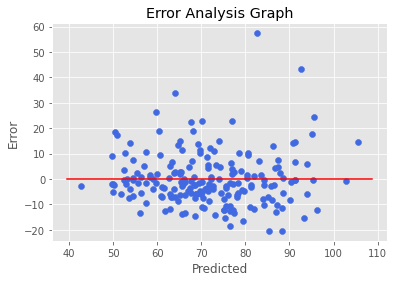

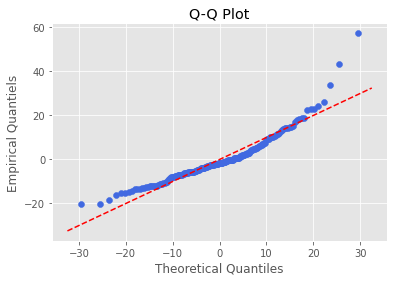

In [393]:
def abline(slope, intercept, style):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, style, c="r")


def plot_error_graph(predictions, errors):
    plt.scatter(predictions, errors, c="royalblue")
    plt.xlabel("Predicted")
    plt.ylabel("Error")
    plt.title("Error Analysis Graph")
    # plt.axhline("-", color="r", linewidth=2.25)
    abline(slope=0, intercept=0, style='-')
    # plt.yticks(["0"])
    plt.show()


def qq_plot(errors):
    std, n = np.std(errors), len(errors)
    empirical_q = np.sort(errors)

    values = [((i - 0.5) / n) for i in range(1, n+1)]
    theoretical_q = [norm.ppf(value, loc=0, scale=std) for value in values]

    plt.title("Q-Q Plot")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Empirical Quantiels")

    plt.scatter(theoretical_q, empirical_q, c="royalblue")
    abline(slope=1, intercept=0, style="--")

    plt.show()


predictions, errors = [], []
for xi, yi in zip(X1, y1):
  y_hat = beta_hat1.T @ xi
  error = yi - y_hat
  predictions.append(y_hat)
  errors.append(error)

plot_error_graph(predictions, errors)

qq_plot(np.array(errors))


- Linearity assumption -- in order to check if the linearity assumption is correct, we created an error analysis graph. As we can see, the points are symmetrical around the line $y=0$ at the center of the graph (between predicted values 60-80). At the left and right parts, there is still symmetry around the desired line, but it's less than the center (at the left part, it's a bit higher than the line, and at the right part, it's a bit lower than the line). Therefore, the overall distribution of points around the line is relatively symmetrical, thus we think it's reasonable to assume linearity.

- Constant variance assumption -- in order to check if the variance of the errors is constant, we created an error analysis graph. As we can see, the "sleeve" of the points is mostly the same (apart from about 5 extreme points out of 200). Therefore, we think it's reasonable to assume that the variance is constant.

- Error Normality assumption -- in order to check if the errors distribute Normally, we created a Q-Q plot [with theoretical quantiles from $N(\mu = 0, \space \sigma^2 = S^2_E)$]. As we can see from the graph, the points indeed represent the desired line ($y=x$), though not perfectly so. Therefore, we think it's reasonable to assume that the errors are distributed Normally.

## Q9

In [394]:
# sample 1000 samples from our dataset (excluding the original 200 random samples)
# we set the "random_state" in order to get consistent results
sampled_indecies = sampled_data1.index.values
data_without_sampled = data.drop(sampled_indecies, axis=0)
new_sampled_data = data_without_sampled.sample(n=1000, random_state=0)

X_new_sampeld, y_new_sampeld = extract_X_y(new_sampled_data, X_columns=["height", "age", "male"], y_column="weight")

## Section A

In [395]:
predictions = []

for x_new in X_new_sampeld:
    prediction = beta_hat1.T @ x_new
    predictions.append(prediction)

## Section B

In [396]:
C = linalg.inv(X1.T @ X1)
z = norm.ppf(0.975)

confidence_intervals = []
for x_new, pred in zip(X_new_sampeld, predictions):
    se_hat = (MSE * (x_new.T @ C @ x_new + 1)) ** 0.5
    confidence_interval = [pred - (z * se_hat), pred + (z * se_hat)]
    confidence_intervals.append(confidence_interval)

## Section C

In [397]:
summ = 0
for y_new, confidence_interval in zip(y_new_sampeld, confidence_intervals):
    l, u = confidence_interval[0], confidence_interval[1]
    
    # the vlaue is in the confidence interval
    if l <= y_new <= u:
        summ += 1

accuracy = summ / len(y_new_sampeld)
print(f"The accuracy level of our confidence intervals is: {accuracy}")

The accuracy level of our confidence intervals is: 0.968


As we can see, the accuracy level is indeed close to 95% (even greater than it). 

By definition, a confidence interval with approximated confidence level of 0.95 means that if we repeat many times the process of calculating the confidence interval and see if the parameter is trapped in it, then it will happen approximately 0.95 of the times (proportion).

As expected, this is the result we got in this section.

## Q10

In [398]:
def add_interact_columns(data, columns):

    for i, first_var in enumerate(columns):
        for second_var in columns[i+1:]:
            data[f"{first_var} x {second_var}"] = data[first_var] * data[second_var]

    return data

In [399]:
# creating the interact columns
sampled_data_interact1 = add_interact_columns(data=sampled_data1[["height", "age", "male", "weight"]].copy(),
                                              columns=["height", "age", "male"])

columns = sampled_data_interact1.columns.to_list()
columns.remove("weight")

X_interact1, y_interact1 = extract_X_y(sampled_data_interact1, X_columns=columns, y_column="weight")
beta_interact_hat1 = find_beta_hat(X_interact1, y_interact1)

print("The mean least square estimator of the intercation model, beta_intercation_hat (based on sampled_data1):")
print(list(np.around(beta_interact_hat1, 3)))

The mean least square estimator of the intercation model, beta_intercation_hat (based on sampled_data1):
[-111.45, 1.066, 1.559, -28.341, -0.011, 0.135, 0.439]


We would like to evaluate the different models by using the following scores: 
- Mallow's statistic $C_p$
- Leave-one-out cross-validation $\hat R_{CV}$

### Mallow's Statistic $C_p$

In [400]:
# finding Mallow's statistic

def R_tr(beta_hat, X, y):
    error_square = 0

    for xi, yi in zip(X, y):
        yi_hat = beta_hat.T @ xi

        error_square += (yi - yi_hat) ** 2

    return error_square

def initialize_Cp(X_all, y_all):
    
    # finding the MSE of the full model
    beta_all_hat = find_beta_hat(X_all, y_all)
    _, SSE_all, _ = find_sum_squares(beta_all_hat, X_all, y_all)
    n_all, p_all = X_all.shape
    MSE_all = SSE_all / (n_all - p_all)

    def Cp(beta_hat, X, y):
        # (X.shape[1] - 1) is the number of explaning variables of the model (not including the bias)
        return R_tr(beta_hat, X, y) + (2 * (X.shape[1] - 1) * MSE_all)
    
    return Cp

In [401]:
Cp = initialize_Cp(X_interact1, y_interact1)

Cp_regular = Cp(beta_hat1, X1, y1)
Cp_intercat = Cp(beta_interact_hat1, X_interact1, y_interact1)

print(f"Mallow's statistic for the regular model: {round(Cp_regular, 3)}")
print(f"Mallow's statistic for the full (interaction) model: {round(Cp_intercat, 3)}")

Mallow's statistic for the regular model: 22808.672
Mallow's statistic for the full (interaction) model: 23258.157


### Leave-one-out cross-validation $\hat R_{CV}$

In [402]:
# finding Leave-one-out cross validation

def R_CV(beta_hat, X, y, model="Logistic Regression"):
    U = X @ linalg.inv(X.T @ X) @ X.T
    
    error_square = 0
    for i, (xi, yi) in enumerate(zip(X, y)):
        yi_hat = beta_hat.T @ xi

        if model == "Logistic Regression":
            yi_hat = sigmoid(yi_hat)

        error_square += ((yi - yi_hat) / (1 - U[i][i])) ** 2

    return error_square

In [403]:
R_CV_regular1 = R_CV(beta_hat1, X1, y1, model="Linear Regression")
R_CV_interact1 = R_CV(beta_interact_hat1, X_interact1, y_interact1, model="Linear Regression")

print(f"R_CV for the regular model: {round(R_CV_regular1, 3)}")
print(f"R_CV for the full (interaction) model: {round(R_CV_interact1, 3)}")

R_CV for the regular model: 23065.098
R_CV for the full (interaction) model: 23449.231


_Mallow's Statistic $C_p$ results:_

As we can see, the regular model got a better (lower) score, therefore, it's the preferred one.


_Leave-one-out cross-validation $\hat R_{CV}$ results:_

As in the first scoring method, the regular model got a better (lower) score, therefore, it's the preferred one.

Following both reasons, we can conclude that the regular model is preferred.

# Part 2 - Logistic Regression

## Q1

The explaining variables we chose:
- height (continuous) - represents the height (in cm) of the athlete. This variable has many values, and therefore we can consider it as a continuous variable by the project instructions.

- weight (continuous) - represents the weight (in kg) of the athlete. This variable has many values, and therefore we can consider it as a continuous variable by the project instructions.

- male (discrete) - represents the gender of the athlete. This variable has only two values, 1 if the athlete is male, and 0 if the athlete is female. It is a binary variable and therefore discrete.

The explained variable we chose:
- won_any (binary) - represents if the athlete won any medals. This variable has only two values, 1 if the athlete won any medals, and 0 if the athlete didn't win a medal. Therefore, it is a binary variable.

### Research question -- Do changes in the variables ('height', 'weight', 'male') affect the probability of an athlete to win a medal?

## Q2

In [404]:
# sample 200 samples from our dataset
# we set the "random_state" in order to get consistent results
# the random state is differnt from part 1 in order the get a different sample
sampled_data2 = data.sample(n=200, random_state=2)
display(sampled_data2)

,nationality,sport,age,male,height,weight,won_any,won_gold,total_medals
5765,CAN,rowing,56,0,160,50,0,0,0
9517,SUI,cycling,33,1,187,73,0,0,0
1945,GER,shooting,35,0,171,63,0,0,0
8498,AUS,aquatics,28,1,193,99,0,0,0
4481,SWE,cycling,22,0,165,55,1,1,1
...,...,...,...,...,...,...,...,...,...
4783,IRL,equestrian,44,1,193,82,0,0,0
9815,FRA,rowing,28,1,183,70,1,0,1
7913,USA,sailing,29,0,173,66,0,0,0
6424,INA,athletics,25,0,165,56,0,0,0


## Q3

In [405]:
# data for Q3
height_values = sampled_data2["height"].values.tolist()
weight_values = sampled_data2["weight"].values.tolist()
age_values = sampled_data2["age"].values.tolist()
won_any_values = sampled_data2["won_any"].values.tolist()

### Section A

Since we used the variables "height", "weight", "age" in part 1, we will only discuss the "won_any" variable in sections A, B. (as stated in the project instructions).

(*) we are using a pie chart for the variable 'won_any' with the same reasoning mentioned in the previous part (same question and section). 

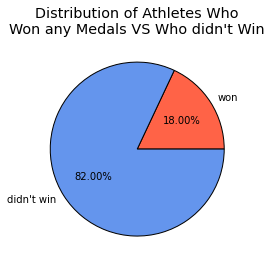

In [406]:
create_pie_chart(won_any_values, show_won_any=True)

### Section B

_Are there any missing values?_

In project part 1, we removed all the records with any missing values of the relevant columns (such as height, weight, etc.).
Therefore, there aren't any missing values in our entire dataset, and that's why there aren't any missing values in the sampled dataset.

_Are there any unusual variables' values?_

- won_any -- this variable has only two values: 1 if the athlete won any medals, 0 if the athlete didn't win a medal. All the values are expectable, therefore we don't have any unusual values.

_Is the distribution of each variable symmetrical?_

As we can see from the graph, the distribution of won_any isn't symmetrical. The vast majority of athletes didn't win a medal.

_Can you assess what is the distribution of each variable?_

We can assume that the distribution of 'won_any' is Bernoulli and the probability to win is much smaller than not to win ($P_{win} < 0.5$).

### Section C

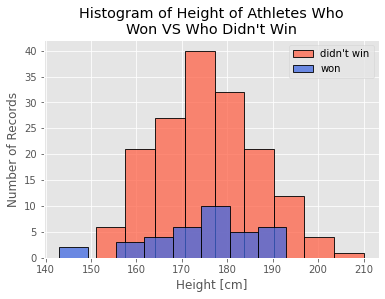

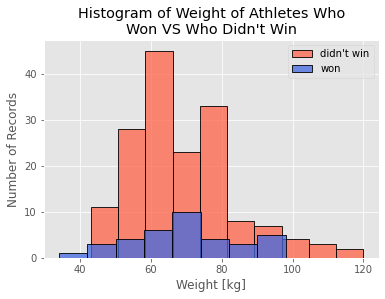

In [407]:
height_values_not_won_any = sampled_data2[sampled_data2["won_any"] == 0]["height"]
height_values_won_any = sampled_data2[sampled_data2["won_any"] == 1]["height"]

weight_values_not_won_any = sampled_data2[sampled_data2["won_any"] == 0]["weight"]
weight_values_won_any = sampled_data2[sampled_data2["won_any"] == 1]["weight"]

create_two_var_histogram(height_values_not_won_any, height_values_won_any, bins_1=9, bins_2=8, 
                         x_label="Height", units="cm", show_won_any=True)
create_two_var_histogram(weight_values_not_won_any, weight_values_won_any, bins_1=10, bins_2=8, 
                         x_label="Weight", units="kg", show_won_any=True)

As we can see from the first graph, it seems that the distribution of height among athletes who won and the distribution of height among athletes who didn't win are very similar. The common value in both histograms is approximately the same, and they're both approximately symmetrical. In addition, the changes between adjacent bars are proportional between the two histograms.

In the second graph, the distribution of weight among athletes who won and the distribution of weight among athletes who didn't win are more different than in the first graph. For the red histogram, in the adjacent bar (right one) to the bar that represents the common value, there's a significant drop in the number of records. On the other hand, for the blue histogram, the equivalent bar (to the one mentioned) represents the common value. Moreover, the red histogram doesn't seem to be very symmetrical, whereas the blue one does (roughly).

Thus, we can conclude that the explaining variable 'weight' affects the explained variable 'won_any' more than the explaining variable 'height'.

## Q4

In [408]:
X2, y2 = extract_X_y(sampled_data2, X_columns=["height", "weight", "male"], y_column="won_any")

# find beta_hat
reg = LogisticRegression(penalty="none", fit_intercept=False).fit(X2, y2)
beta_hat2 = reg.coef_[0]

print(f"The model MLE estimator (based on the sampled_data2):")
print(list(np.around(beta_hat2, 3)))

The model MLE estimator (based on the sampled_data2):
[0.042, -0.02, 0.035, -0.898]


Effect on expected 'won_any' variable (explained variable) by incrementing each of 'height', 'weight', 'male' variables (explaining variables):

- Height -- decreases the log odds ratio to win by 0.02
- Weight -- increases the log odds ratio to win by 0.035
- Gender ('male') -- decreases the log odds ratio to win by 0.898

Our result implies that the explaining variable 'male' has a much more significant impact on the log odds ratio to win, than the variables 'height' and 'weight' (since their coefficient is fairly close to zero).

## Q5

In this question, we will find a confidence interval for $\beta^*_j$ for all $0 \le j \le k$

Each confidence interval will have an approximated confidence level of 0.95.

In [409]:
def sigmoid(x):
    return (e ** x) / (1 + (e ** x))


def find_beta_hat_var_hat(beta_hat, X):
    V_diag = []

    for xi in X:
        pi_i = sigmoid(beta_hat.T @ xi)
        V_diag.append(pi_i * (1-pi_i))

    V_hat = np.diag(V_diag)
    beta_hat_var_hat = linalg.inv(X.T @ V_hat @ X)

    return beta_hat_var_hat

beta_hat_var_hat = find_beta_hat_var_hat(beta_hat2, X2)
z = norm.ppf(0.975)

for i, beta_i_hat in enumerate(beta_hat2):
    se_i_hat = (beta_hat_var_hat[i][i]) ** 0.5
    confidence_interval = [round(beta_i_hat - (z * se_i_hat), 3), round(beta_i_hat + (z * se_i_hat), 3)]
    print(f"Confidence interval for beta {i} with approximated confidence level of 0.95:")
    print(confidence_interval)
    print()

Confidence interval for beta 0 with approximated confidence level of 0.95:
[-8.022, 8.106]

Confidence interval for beta 1 with approximated confidence level of 0.95:
[-0.078, 0.037]

Confidence interval for beta 2 with approximated confidence level of 0.95:
[-0.009, 0.079]

Confidence interval for beta 3 with approximated confidence level of 0.95:
[-1.894, 0.097]



In [410]:
X_all2, y_all2 = extract_X_y(data, X_columns=["height", "weight", "male"], y_column="won_any")

# find beta_hat on all the data
reg = LogisticRegression(penalty="none", fit_intercept=False).fit(X_all2, y_all2)
beta_all_hat2 = reg.coef_[0]

print(f"The model MLE estimator (based on all the data):")
print(list(np.around(beta_all_hat2, 3)))

The model MLE estimator (based on all the data):
[-6.029, 0.023, 0.008, -0.536]


We can see that for all $0 \le j \le k,$ our MLE estimator $\hat\beta_j$ (calculated based on the full dataset) is trapped in the confidence interval calculated based on the sampled data (200 random samples).

## Q6

In [411]:
sampled_data_interact2 = add_interact_columns(data=sampled_data2[["height", "weight", "male", "won_any"]].copy(),
                                              columns=["height", "weight", "male"])

columns = sampled_data_interact2.columns.to_list()
columns.remove("won_any")

X_interact2, y_interact2 = extract_X_y(sampled_data_interact2, X_columns=columns, y_column="won_any")

reg = LogisticRegression(penalty="none", fit_intercept=False).fit(X_interact2, y_interact2)
beta_interact_hat2 = reg.coef_[0]

print(f"the interact model MLE estimator (based on sampled_data2):")
print(list(np.around(beta_interact_hat2, 4)))

the interact model MLE estimator (based on sampled_data2):
[-0.0001, -0.0172, -0.0014, -0.0, 0.0002, -0.0058, 0.0012]


We would like to check which model is better (original or interact). Therefore, we will use the following methods:
- Likelihood Test
- Leave-one-out cross-validation ($\hat R_{CV}$)

### Likelihood Ratio Test

We will perform this test with level $\alpha=0.05$ in order to check the following hypotheses:

$H_0:$ $\beta^*_{1,2} = \beta^*_{1,3} = \beta^*_{2,3} = 0$

$H_1: \beta^*_{i,j} \ne 0 \space for \space some \space (i, j) \in \{(1, 2), (1,3), (2,3)\}$

The test statistic: $\lambda = 2log(\frac{L(\hat\beta)}{L(\hat\beta_0)})$ where:

- $\hat\beta$ is the MLE of the entire parameter space.
- $\hat\beta_0$ is the MLE of the parameter space under the null hypothesis.

The Reject Region: $\lambda > \chi^2_{0.95,\space r-q}$

- r is the dimension of the entire parameter space.
- q is the dimension of the parameter space under the null hypothesis.

In [412]:
def LR_log_likelihood(beta_hat, X, y):
    summ = 0
    for xi, yi in zip(X, y):
        item1 = yi * beta_hat.T @ xi
        item2 = log(1 + e ** (beta_hat.T @ xi))

        summ += (item1 - item2)
    
    return summ

# test statistic
lambdaa = 2 * (LR_log_likelihood(beta_interact_hat2, X_interact2, y_interact2) - LR_log_likelihood(beta_hat2, X2, y2))

# the number of paramters under the entrie paramter space is (X_interact2.shape[1] - 1)
# the number of paramters under the parameter space under the null hypothesis is (X2.shape[1] - 1)
r = X_interact2.shape[1] - 1
q = X2.shape[1] - 1

# reject region
q_chi2 = chi2.ppf(0.95, r-q)

reject_h0 = lambdaa > q_chi2

if reject_h0:  
    print(f"The result of our test is --- Reject H_0")
else:
    print(f"The result of the test is --- Retain H_0")

The result of the test is --- Retain H_0


### Leave-one-out cross-validation $\hat R_{CV}$

In [413]:
R_CV_regular2 = R_CV(beta_hat2, X2, y2, model="Logistic Regression")
R_CV_interact2 = R_CV(beta_interact_hat2, X_interact2, y_interact2, model="Logistic Regression")

print(f"R_CV for the regular model: {round(R_CV_regular2, 3)}")
print(f"R_CV for the full (interaction) model: {round(R_CV_interact2, 3)}")

R_CV for the regular model: 30.155
R_CV for the full (interaction) model: 31.437


_Likelihood Ratio Test results:_

It appears that according to the test, we retain the null hypothesis with level $\alpha = 0.05$.


_Leave-one-out cross-validation $\hat R_{CV}$ results:_

As we can see, the regular model got a better (lower) score, therefore, it's the preferred one.

Following both reasons, we can conclude that the regular model is preferred.

## Q7 + Q8

First, among all the columns, we chose to remove 'won_gold' and 'total_medals', since they directly imply the value of the explained variable 'won_any' [for instance, if the total number of medals that an athlete won is positive ('total_medals' > 0), we can conclude that they won a medal ('won_any' = 1)].

Second, our remaining columns contain the categorical variables 'nationality' and 'sport'. The proper way to represent them numerically would be by one hot encoding. However, since the total number of unique values under those columns is approximately 100, we will need to add roughly 100 new columns in order to represent these columns. In addition, we were instructed in the question to create all first-order interactions which will increase the number of columns even more (drastically so). 

After consulting the problem at an office hour, we were advised to think of a creative way to map each column's unique values into numerical values to be able to create an order relation between them.

For the 'nationality' variable, we ranked the unique values according to the number of athletes from each nationality (in ascending order), based on the sample we generated in part 2. Then we mapped each unique value to its corresponding order statistic (based on the order mentioned above). For the 'sport' variable, we did the same, while this time ranking according to the number of athletes from each sport. As a result, we can represent each categorical variable by a single numerical column.

In [414]:
def update_categorical_to_numerical(data, col):
    col_values = data[[col, "age"]].groupby(col).count().sort_values("age").index.tolist()

    # the value of each col_value (key) is the order statistic
    col_dic = {}
    for i, col_value in enumerate(col_values):
        col_dic[col_value] = i

    original_col = sampled_data2[col].tolist()
    new_col = [col_dic[original_name] for original_name in original_col]

    data[col] = new_col

In [415]:
# create the data for Q7, Q8

numerical_sampled_data2 = sampled_data2.drop(["won_gold", "total_medals"].copy(), axis=1)

# convert the categorical variables 'nationality' and 'sport' to numerical (as mentioned)
update_categorical_to_numerical(numerical_sampled_data2, col="nationality")
update_categorical_to_numerical(numerical_sampled_data2, col="sport")

# add the interact columns
columns = numerical_sampled_data2.columns.tolist()
columns.remove("won_any")
numerical_interact_sampled_data2 = add_interact_columns(numerical_sampled_data2, columns)

columns = numerical_interact_sampled_data2.columns.tolist()
columns.remove("won_any")
numerical_X_all_interact2, numerical_y_all_interact2 = extract_X_y(numerical_interact_sampled_data2, columns, y_column="won_any")

In [416]:
# functions for Q7, Q8

def AIC(beta_hat, X, y):
    # the number of parameters of the model is (X_interact2.shape[1] - 1) (not including the bias)
    var_num = X.shape[1] - 1
    return LR_log_likelihood(beta_hat, X, y) - var_num


def BIC(beta_hat, X, y):
    # the number of parameters of the model is (X.shape[1] - 1) (not including the bias)
    n, var_num = X.shape[0], (X.shape[1] - 1)
    return LR_log_likelihood(beta_hat, X, y) - ((var_num / 2) * log(n))



def initialize_score_function(score_method):

    if score_method == "AIC":
        return AIC
    
    elif score_method == "BIC":
        return BIC
    
    return None


def foward_stepwise_regression(data, variables, explained_variable, score_function):
    model_variables, model_score = [], -float('inf')

    while True:
        res_lst = []
        
        # going over all the varaibles we still didn't add to the model
        for var in variables:
            # the added model with 'var' as explained variable
            temp = model_variables.copy()
            temp.append(var)

            # finding the score of the added model
            X, y = extract_X_y(data, X_columns=temp, y_column=explained_variable)
            beta_hat = find_beta_hat(X, y)
            score = score_function(beta_hat, X, y)

            res_lst.append((var, score))
        
        # find the variable who achived the best score (higher since we are using AIC, BIC scoring methods)
        best_added_var, best_added_score = max(res_lst, key=lambda x: x[1])

        # if the 'new_added_score' is better (higher), add 'best_added_var' to the model as an explaining variable
        if best_added_score > model_score:
            model_variables.append(best_added_var)
            variables.remove(best_added_var)
            model_score = best_added_score

        # otherwise, the score didn't imporove. therefore we exit the loop the finish the algorithm's run
        else:
            break

    return model_variables, model_score


def backward_stepwise_regression(data, model_variables, explained_variable, score_function):

    # get the score of the model the contains all the variabels as explained variabels
    X_all, y_all = extract_X_y(data, X_columns=model_variables, y_column=explained_variable)
    beta_hat_all = find_beta_hat(X_all, y_all)
    model_score = score_function(beta_hat_all, X_all, y_all)

    # the number of explaning variables of the model must be at least one
    while len(model_variables) > 1:
        res_lst = []
        # going over all the varaibles we still didn't remove from the model
        for var in model_variables:
            # the removed model with 'var' as no logner an explained variable
            temp = model_variables.copy()
            temp.remove(var)

            # finding the score of the removed model
            X, y = extract_X_y(data, X_columns=temp, y_column=explained_variable)
            beta_hat = find_beta_hat(X, y)
            score = score_function(beta_hat, X, y)
            res_lst.append((var, score))
        

        # find the variable who achived the best score (higher since we are using AIC, BIC scoring methods)
        best_removed_var, best_removed_score = max(res_lst, key=lambda x: x[1])

        # if the 'best_removed_score' is better (higher), remove 'best_removed_var' from the model as an explaining variable
        if best_removed_score > model_score:
            model_variables.remove(best_removed_var)
            model_score = best_removed_score

        # otherwise, the score didn't imporove. therefore we exit the loop the finish the algorithm's run
        else:
            break

    return model_variables, model_score

## Q7

In [417]:
# AIC score function
score_function = initialize_score_function(score_method="AIC")

best_model_forward, model_score_fowrward = foward_stepwise_regression(numerical_interact_sampled_data2, 
                                                                      columns.copy(), "won_any", score_function)
best_model_backward, model_score_backward = backward_stepwise_regression(numerical_interact_sampled_data2, 
                                                                         columns.copy(), "won_any", score_function)

print(" --*-- Results when using AIC method --*--\n")
print("Forward Stepwise Regression:")
print(f"The best model: {best_model_forward}, with score: {round(model_score_fowrward, 3)}\n")
print("Backward Stepwise Regression:")
print(f"The best model: {best_model_backward}, with score: {round(model_score_backward, 3)}")

 --*-- Results when using AIC method --*--

Forward Stepwise Regression:
The best model: ['nationality'], with score: -151.314

Backward Stepwise Regression:
The best model: ['nationality'], with score: -151.314


In this question, we used AIC as the scoring function.

We can see that both algorithms (forward and backward stepwise regression) reached the same model, that includes only a single explaining variable: ('nationality') **(with a score of -151.314)**.

Since both models (under this scoring function) are the same, we will choose it as the best model (among all the models allowing first order interactions).

## Q8

In [418]:
# BIC score function
score_function = initialize_score_function(score_method="BIC")

best_model_forward, model_score_fowrward = foward_stepwise_regression(numerical_interact_sampled_data2, 
                                                                      columns.copy(), "won_any", score_function)
best_model_backward, model_score_backward = backward_stepwise_regression(numerical_interact_sampled_data2, 
                                                                         columns.copy(), "won_any", score_function)

print(" --*-- Results when using BIC method --*--\n")
print("Forward Stepwise Regression:")
print(f"The best model: {best_model_forward}, with score: {round(model_score_fowrward, 3)}\n")
print("Backward Stepwise Regression:")
print(f"The best model: {best_model_backward}, with score: {round(model_score_backward, 3)}")

 --*-- Results when using BIC method --*--

Forward Stepwise Regression:
The best model: ['nationality'], with score: -152.963

Backward Stepwise Regression:
The best model: ['nationality'], with score: -152.963


In this question, we used BIC as the scoring function.

We can see that both algorithms (forward and backward stepwise regression) reached the same model, that includes only a single explaining variable: ('nationality') **(with a score of -152.963)**.

Since both models (under this scoring function) are the same, we will choose it as the best model (among all the models allowing first order interactions).

Note that this is the same model we chose in Q7 (using AIC method).

We assume the reason for it is that both methods (AIC, BIC) are very similar. The main difference between them is that BIC takes into account log(n) in the 'punishing factor' of the method. Since our generated sample contains only 200 records, the 'punishment' effect of log(n) wasn't significant. Therefore, we got the same results on both questions (with a very similar model score).